In [1]:
import sklearn #Sklearn is most applicable in our situation to classify groups of things. Given a training

In [2]:
from sklearn.datasets import load_iris #and validation data set, we can predict or classify a group of testing to 
iris = load_iris() #fit our hypothesized model

In [3]:
print(iris.data.shape)

(150, 4)


In [4]:
print(iris.target.shape)
print(iris.target) #in this situation, we can use the iris data set that has 3 groups of flowers. 

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


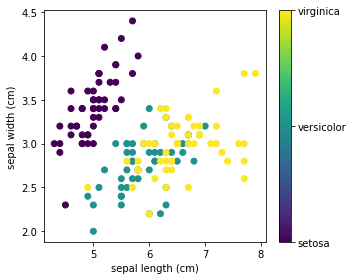

In [6]:
from matplotlib import pyplot as plt
x_index = 0  #we want to have 2D views of the iris dataset
y_index = 1
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)]) #label colorbar
plt.figure(figsize=(5, 4)) 
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter) #this is the color bar at the right of the graph
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression(normalize=True)

In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
x = np.array([0, 1, 2])
y = np.array([0, 1, 2]) #data fitting
X = x[:, np.newaxis] #2d dataset
X
model=make_pipeline(StandardScaler(with_mean=False),GaussianNB(priors=None))
print(model)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('gaussiannb', GaussianNB())])


In [10]:
from sklearn import neighbors, datasets
X, y = iris.data, iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
print(iris.target_names[knn.predict([[5, 1, 4, 2]])]) #predict what a 5x1 sepal and 4x2 petal would give us

['versicolor']


In [11]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap #nearest neighbor classification
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF']) #create color maps for 3x classification of petals 
iris = datasets.load_iris()
X = iris.data[:, :2] #only take the first 2 features, avoid by using 2 dimensional dataset 
y = iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=1) 
knn.fit(X, y)
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

(4.180808080808081, 8.019191919191918, 1.8868686868686868, 4.513131313131313)

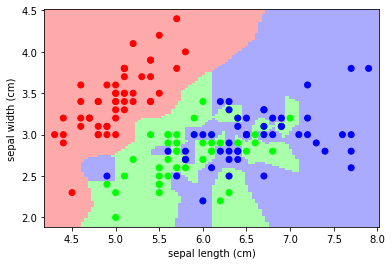

In [12]:
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

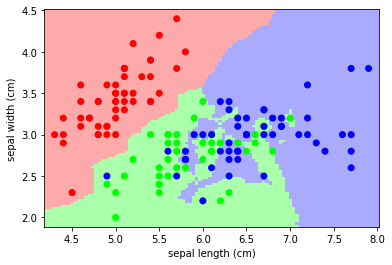

In [13]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3) #this is the 3 neighbors classifier, copied from the nearest neighbor
knn.fit(X, y) #code except with 3 neighbors instead of one. 
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')
plt.show()